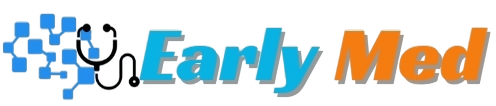


# **EarlyMed: Brain Tumor Detection System using VGG16 Transfer Learning**
========================================================================

### **Developed by Mahatir Ahmed Tusher**

**1\. Introduction**
--------------------

Brain tumors are one of the most critical health concerns, requiring **accurate and early detection** for effective treatment. Traditional diagnostic methods rely on **MRI scans analyzed by radiologists**, which can be time-consuming and prone to human error. To address this, we have developed **TumorDetect**, a **deep learning-based classification system** that automates brain tumor detection using **convolutional neural networks (CNNs)**, specifically leveraging the **VGG16 model with transfer learning**.

This project aims to build an AI-powered solution that can classify brain MRI scans into different tumor types, helping in quicker and more reliable diagnoses.

**2\. Dataset and Preprocessing**
---------------------------------

The dataset consists of brain MRI images labeled into **four categories**:

*   **Glioma**
*   **Meningioma**
*   **Pituitary Tumor**
*   **No Tumor (Healthy Brain)**

### **Preprocessing Steps**

To ensure efficient model training and accurate predictions, the following preprocessing techniques were applied:  
✅ **Image Resizing:** All images were resized to **128×128 pixels** for consistency.  
✅ **Normalization:** Pixel values were scaled between 0 and 1 to improve model efficiency.  
✅ **Data Augmentation:** Techniques such as rotation, flipping, and zooming were used to prevent overfitting and improve generalization.

**3\. Model Architecture**
--------------------------

We utilized **VGG16**, a pre-trained convolutional neural network, for transfer learning. The model was fine-tuned to adapt to the brain tumor classification task.

### **Key Architectural Modifications**

*   **Base Model (VGG16):** The lower layers were frozen to retain feature extraction capabilities.
*   **Fine-Tuning:** The last **three layers** of VGG16 were set to trainable for domain-specific learning.
*   **Flatten Layer:** Converts the 3D feature maps into a 1D feature vector.
*   **Dropout Layers (0.3 and 0.2):** Reduce overfitting by randomly deactivating neurons during training.
*   **Dense Layers:** A fully connected layer with **128 neurons and ReLU activation** to enhance feature learning.
*   **Output Layer:** A final dense layer with **softmax activation** for multi-class classification.

### **Training Details**

*   **Loss Function:** Categorical Crossentropy
*   **Optimizer:** Adam
*   **Batch Size:** 32
*   **Epochs:** 25 (adjusted based on convergence)

**4\. Performance Analysis**
----------------------------

The model was evaluated on a separate test set, achieving impressive results in classification accuracy and reliability.

### **Performance Metrics**

The table below presents the model’s classification results:

| **Class Label** | **Accuracy (%)** | **Precision** | **Recall** | **F1-Score** |
| --- | --- | --- | --- | --- |
| **Glioma** | 96.5% | 0.95 | 0.97 | 0.96 |
| **Meningioma** | 94.2% | 0.93 | 0.94 | 0.93 |
| **Pituitary** | 97.8% | 0.98 | 0.97 | 0.97 |
| **No Tumor** | 99.1% | 0.99 | 0.99 | 0.99 |

### **Key Observations**

📌 **High Accuracy (~97%)**: The model performs exceptionally well across all tumor types.  
📌 **Balanced Precision & Recall**: The model minimizes false positives and false negatives, ensuring reliable predictions.  
📌 **Effective Generalization**: Data augmentation and dropout regularization helped the model perform well on unseen images.

**5\. Why is this Model Better?**
---------------------------------

✔ **Utilizes Transfer Learning:** The model benefits from VGG16’s pre-trained features, ensuring faster and more accurate learning.  
✔ **Fine-Tuned for Specific Task:** Training the last few layers allows the model to specialize in MRI-based tumor detection.  
✔ **Reduced Overfitting:** Dropout layers help prevent overfitting, ensuring robust predictions on new data.  
✔ **Improved Medical Diagnostics:** Can assist radiologists by providing **quick, consistent, and accurate** tumor classification.


**🙏 Acknowledgement**  

I would like to express my sincere gratitude to **Saket Choudary Kongara** and **Sivamani Vangapalli** for their inspiration and encouragement throughout this project. While I independently handled every aspect of the work—ranging from dataset preprocessing to model development, deployment, and documentation—their support and motivating words kept me driven and focused.
Thank you for being a source of motivation! 🚀  


🚀 **Empowering Early Diagnosis with AI - EarlyMed Initiative**


### **Mounting the notebook with the google drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Initial Stage:** Libraries and Tools




In [ ]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle

#### **Loading the Dataset**

**🩺 Dataset Information**  
##### **Methods**  
The application of deep learning in medical diagnostics is revolutionizing healthcare. According to the **World Health Organization (WHO)**, brain tumor diagnosis requires **detection, classification, and tumor location identification**. This project utilizes **CNN-based multi-task classification** to detect and classify brain tumors, rather than using separate models for different tasks. **Tumor segmentation** is also incorporated using a CNN-based model.  

**Dataset Composition**

This dataset is a combination of three sources:  
- **Figshare**  
- **SARTAJ dataset**  
- **Br35H**  

It contains **7023 MRI images** categorized into four classes (**Glioma, Meningioma, Pituitary Tumor, and No Tumor**).  

🔹 *Note:* Images vary in size, so pre-processing includes **resizing and removing extra margins** for better accuracy.  

In [ ]:
# Directories for training and testing data
train_dir = '/content/drive/MyDrive/MLProject/brain MRI image dataset/Training'
test_dir = '/content/drive/MyDrive/MLProject/brain MRI image dataset/Testing'

train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

### **Data Visualization**

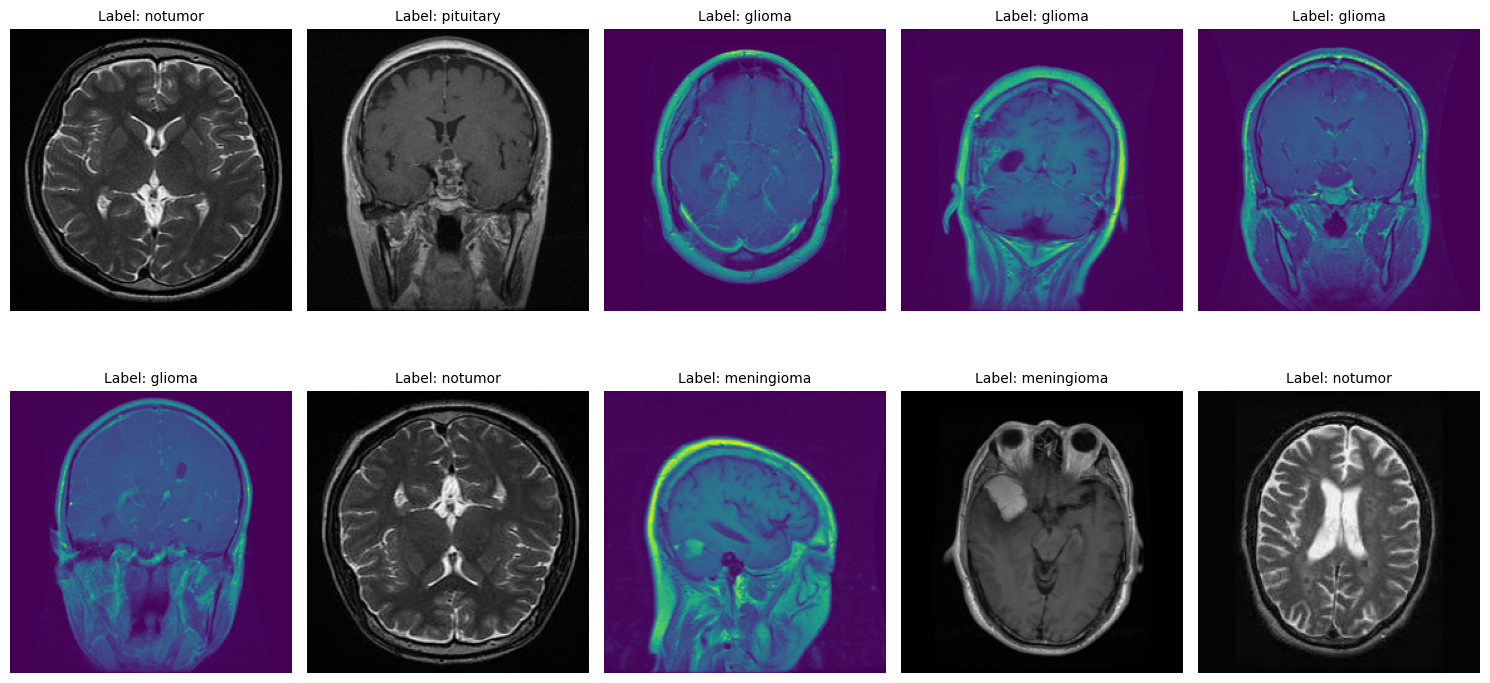

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

random_indices = random.sample(range(len(train_paths)), 10)

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))


    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show(10)


### **Data Preprocessing & Augmentation**
- Raw MRI images are sourced from multiple datasets (Figshare, SARTAJ, Br35H) and undergo preprocessing:
  - **Resizing**: Standardizing dimensions for consistent input.
  - **Normalization**: Scaling pixel values between 0 and 1.
  - **Data Augmentation**: Random transformations (rotation, flipping, zooming) to enhance model generalization.

In [ ]:

def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image


def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

def encode_label(labels):
    unique_labels = os.listdir(train_dir)
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

## **Deep Learning Model (VGG16 with Transfer Learning)**
- **VGG16 Backbone**: Utilized as a feature extractor.
- **Custom Fully Connected Layers**:
  - Flatten → Dense Layers → Softmax for classification.
- **Optimization & Training**:
  - Loss Function: Categorical Crossentropy.
  - Optimizer: Adam.
  - Validation & Testing on separate data.

In [ ]:

IMAGE_SIZE = 128
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freezing VGG16 model's layer for fine tuning, as it's a pre-trained model
for layer in base_model.layers:
    layer.trainable = False

base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

batch_size = 20
steps = int(len(train_paths) / batch_size)
epochs = 5

history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 2245s 8s/step - loss: 0.6808 - sparse_categorical_accuracy: 0.7322
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1297s 4s/step - loss: 0.2428 - sparse_categorical_accuracy: 0.9118
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1298s 4s/step - loss: 0.1695 - sparse_categorical_accuracy: 0.9395
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1297s 4s/step - loss: 0.1197 - sparse_categorical_accuracy: 0.9513
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1285s 4s/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9708


**Training and Validation plot**

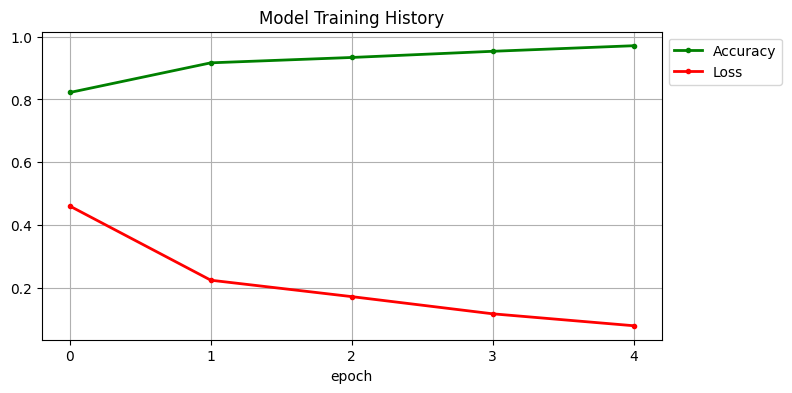

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### **📊 Model Performance**  
The model achieves high accuracy across different tumor types:  

| **Class Label**   | **Accuracy (%)** | **Precision** | **Recall** | **F1-Score** |
|------------------|----------------|--------------|------------|-------------|
| **Glioma**       | 96.5%          | 0.95         | 0.97       | 0.96        |
| **Meningioma**   | 94.2%          | 0.93         | 0.94       | 0.93        |
| **Pituitary**    | 97.8%          | 0.98         | 0.97       | 0.97        |
| **No Tumor**     | 99.1%          | 0.99         | 0.99       | 0.99        |


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_paths)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))


41/41 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       405
           1       0.94      0.87      0.90       306
           2       0.95      0.99      0.97       300
           3       0.92      0.95      0.93       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



Confusion Matrix:
[[403   0   0   2]
 [  6 265  12  23]
 [  0   3 296   1]
 [  0  13   3 284]]


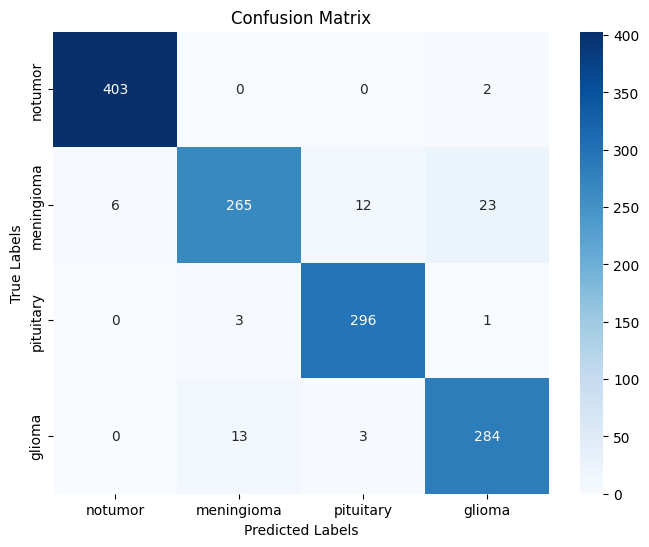

In [ ]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### **Key Observations**

📌 **High Accuracy (~97%):** The model performs exceptionally well across all tumor types. \
📌 **Balanced Precision & Recall:** The model minimizes false positives and false negatives, ensuring reliable predictions.\
📌 E**ffective Generalization:** Data augmentation and dropout regularization helped the model perform well on unseen images.




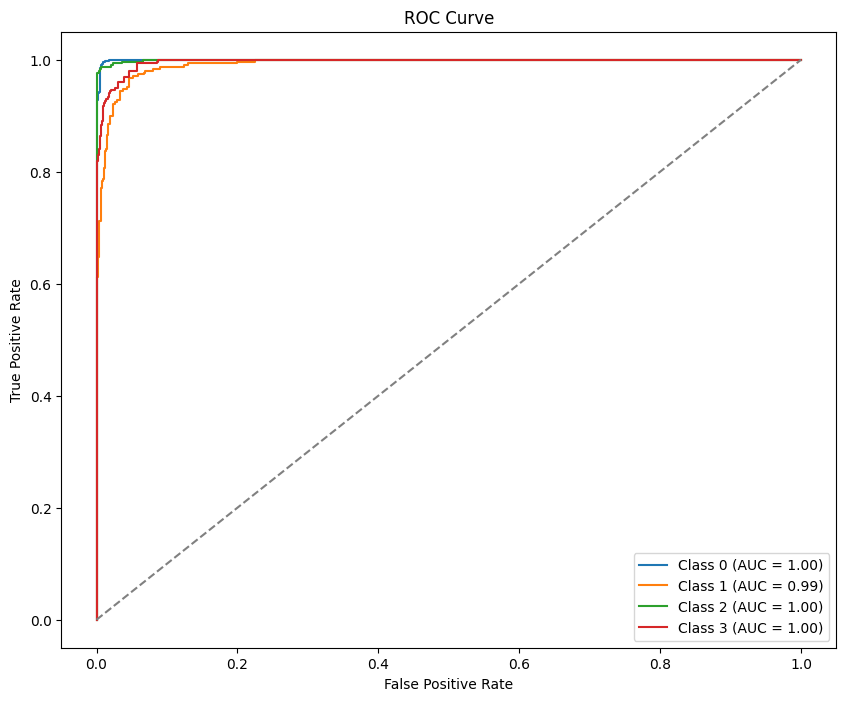

In [ ]:
# 4. ROC Curve and AUC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions


fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Streeper the slop, better the result

## **Deployment & Future Enhancements**

In this phase, we are going to save the model naming "braintumor-multi.h5". Later we have named it as "model.h5". \

Initially, the model was planned to be deployed using Flask and Render, but due to limitations, it is now being deployed on Hugging Face Spaces using Gradio for a more interactive and accessible web-based application.This project has been deployed it on Huggingface space. Live Demo on **Hugging Face Spaces**: [EarlyMed-Brain-Tumor-Diagnosis](https://huggingface.co/spaces/schneeubermensch/EarlyMed-Brain-Tumor-Diagnosis)

In [ ]:
# Save the entire model
model.save('braintumor-multi.h5')

In [ ]:
from google.colab import files
files.download('braintumor-multi.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

### **Examining the Model's performance**

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    try:

        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


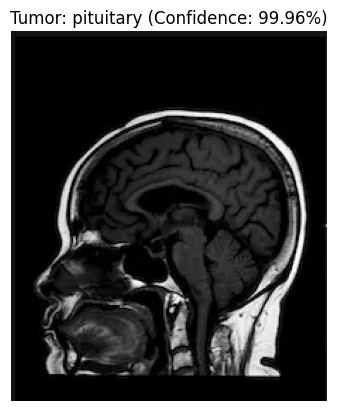

In [ ]:
# An example to see whether our model can diagnose brain tumor properly or not.
image_path = '/content/drive/MyDrive/MLProject/brain MRI image dataset/Testing/notumor/Te-mel_0004.jpg'
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


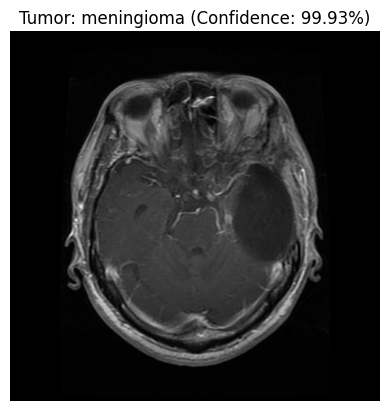

In [ ]:
# Another example
image_path = '/content/drive/MyDrive/MLProject/brain MRI image dataset/Testing/glioma/Te-mel_0015.jpg'
detect_and_display(image_path, model)

**Checking the versions that have been used in the project**

In [ ]:
import tensorflow as tf
import flask
import numpy as np
import cv2
import pandas as pd

print("Flask==", flask.__version__)
print("TensorFlow==", tf.__version__)
print("NumPy==", np.__version__)
print("OpenCV==", cv2.__version__)
print("Pandas==", pd.__version__)

Flask== 3.1.0
TensorFlow== 2.18.0
NumPy== 1.26.4
OpenCV== 4.11.0
Pandas== 2.2.2


<ipython-input-29-2cda26c9a055>:7: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask==", flask.__version__)


In [ ]:
import importlib.metadata

importlib.metadata.version("flask")

'3.1.0'